<a href="https://colab.research.google.com/github/trishvilladiego/CSST106-CS4A/blob/main/4A_VILLADIEGO_EXER1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Apply image processing techniques(Scaling, Rotation, Blurring, Edge Detection) OpenCV**

# **Step 1: Install OpenCV**

In [1]:
!pip install opencv-python-headless

# **Step 2: Import Necessary Libraries**

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def display_image(img,title='Image'):
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.title(title)
  plt.axis('off')
  plt.show()

def display_images(img1, img2, title1="Image 1", title2="Image 2"):
  plt.subplot(1, 2, 1)
  plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
  plt.title(title1)
  plt.axis('off')
  plt.subplot(1, 2, 2)
  plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
  plt.title(title2)
  plt.axis('off')
  plt.show()

# **Step 3: Load an Image**

Saving IMG_7463.JPG to IMG_7463.JPG


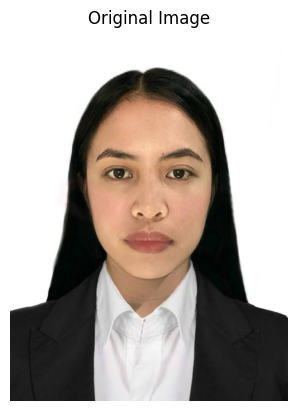

In [3]:
from google.colab import files
from io import BytesIO
from PIL import Image

# Upload an image
uploaded = files.upload()

# Convert to OpenCV format
image_path = next(iter(uploaded)) # Get the image file name
image = Image.open(BytesIO(uploaded[image_path]))
image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
display_image(image,"Original Image")

# **Exercise 1: Scaling and Rotating**

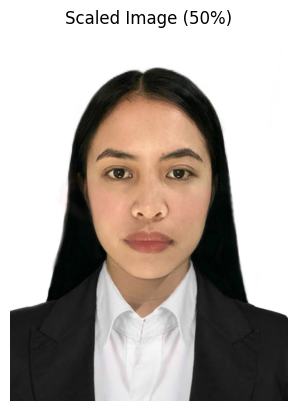

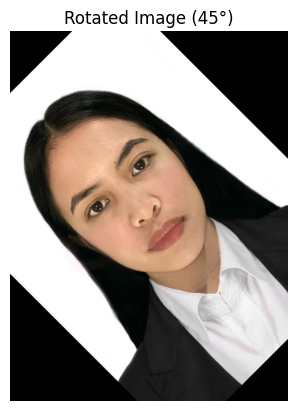

In [7]:
# Scaling
def scale_image(img, scale_factor):
  height, width = img.shape[:2]
  scaled_img = cv2.resize(img,
  (int(width * scale_factor), int(height * scale_factor)), interpolation=cv2.INTER_LINEAR)
  return scaled_img

# Rotate
def rotate_image(img, angle):
  height, width = img.shape[:2]
  center = (width // 2, height // 2)
  matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
  rotated_img = cv2.warpAffine(img, matrix, (width, height))
  return rotated_img

# Scale image by 0.5
scaled_image = scale_image(image, 0.5)
display_image(scaled_image, "Scaled Image (50%)")
# Rotate image by 45 degrees
rotated_image = rotate_image(image, 45)
display_image(rotated_image, "Rotated Image (45°)")


# **Exercise 2: Blurring Techniques**

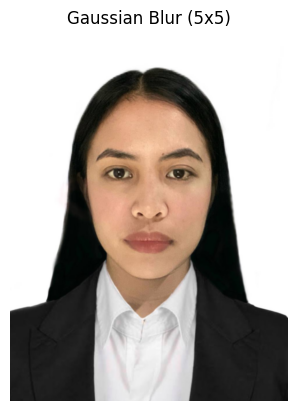

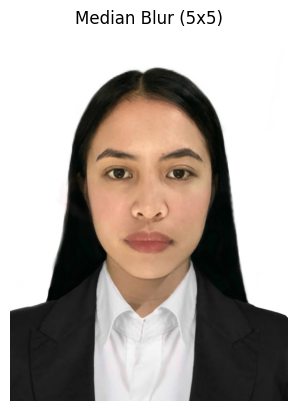

In [8]:
# Gaussian Blur
gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)
display_image(gaussian_blur, "Gaussian Blur (5x5)")

# Median Blur
median_blur = cv2.medianBlur(image, 5)
display_image(median_blur, "Median Blur (5x5)")

# **Exercise 3: Edge Detection using Canny**

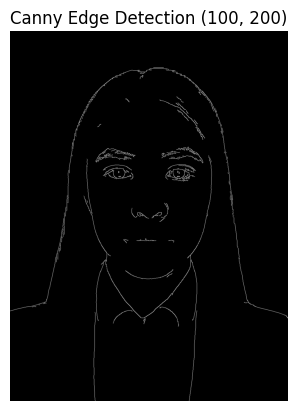

In [9]:
# Canny Edge Detection
edges = cv2.Canny(image, 100, 200)
display_image(edges, "Canny Edge Detection (100, 200)")

# **Exercise 4: Basic Image Processor (Interactive)**

Enter action (scale, rotate, gaussian_blur, median_blur, canny): canny


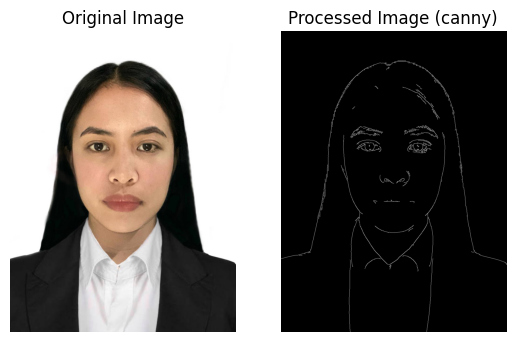

In [11]:
def process_image(img, action):
  if action == 'scale':
    return scale_image(img, 0.5)
  elif action == 'rotate':
    return rotate_image(img, 45)
  elif action == 'gaussian_blur':
    return cv2.GaussianBlur(img, (5, 5), 0)
  elif action == 'median_blur':
    return cv2.medianBlur(img, 5)
  elif action == 'canny':
    return cv2.Canny(img, 100, 200)
  else:
    return img

action = input("Enter action (scale, rotate, gaussian_blur, median_blur, canny): ")
processed_image = process_image(image, action)
display_images(image, processed_image, "Original Image", f"Processed Image ({action})")

# **Exercise 5: Comparison of Filtering Techniques**

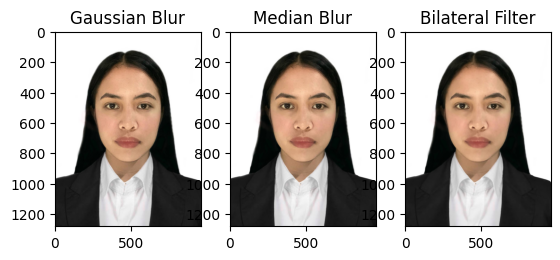

In [12]:
# Applying Gaussian, Median, and Bilateral filters
gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)
median_blur = cv2.medianBlur(image, 5)
bilateral_filter = cv2.bilateralFilter(image, 9, 75, 75)
"""
cv2.bilateralFilter(): This filter smooths the image while keeping edges sharp, unlike Gaussian or median filters. It’s useful for reducing noise while preserving details. """
# Display the results for comparison plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(gaussian_blur, cv2.COLOR_BGR2RGB))
plt.title("Gaussian Blur")
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(median_blur, cv2.COLOR_BGR2RGB))
plt.title("Median Blur")
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(bilateral_filter, cv2.COLOR_BGR2RGB))
plt.title("Bilateral Filter")
plt.show()

# **Exercise 6: Sobel Edge Detection**

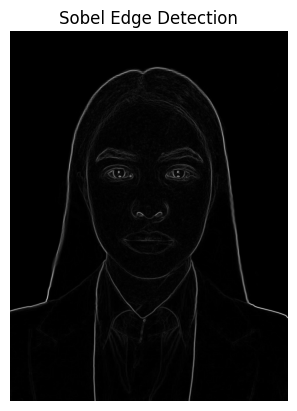

In [14]:
# Sobel Edge Detection
def sobel_edge_detection(img):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Sobel edge detection in the x direction
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)

    # Sobel edge detection in the y direction
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)

    # Combine the two gradients
    sobel_combined = cv2.magnitude(sobelx, sobely)

    return sobel_combined

# Apply Sobel edge detection to the uploaded image
sobel_edges = sobel_edge_detection(image)
plt.imshow(sobel_edges, cmap='gray')
plt.title("Sobel Edge Detection")
plt.axis('off')
plt.show()

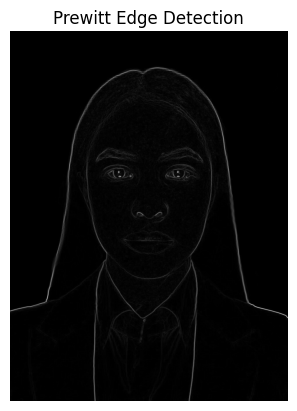

In [15]:
# Prewitt Edge Detection
def prewitt_edge_detection(img):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Prewitt operator kernels for x and y directions
    kernelx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]], dtype=int)
    kernely = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype=int)

    # Applying the Prewitt operator
    prewittx = cv2.filter2D(gray, cv2.CV_64F, kernelx)
    prewitty = cv2.filter2D(gray, cv2.CV_64F, kernely)

    # Combine the x and y gradients by converting to floating point
    prewitt_combined = cv2.magnitude(prewittx, prewitty)

    return prewitt_combined

# Apply Prewitt edge detection to the uploaded image
prewitt_edges = prewitt_edge_detection(image)
plt.imshow(prewitt_edges, cmap='gray')
plt.title("Prewitt Edge Detection")
plt.axis('off')
plt.show()

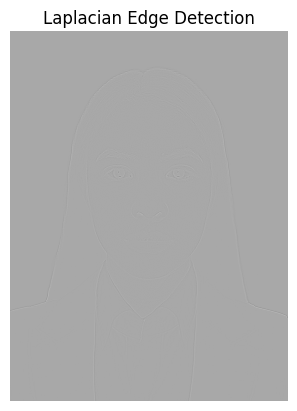

In [16]:
def laplacian_edge_detection(img):
# Convert to grayscale
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # Apply Laplacian operator
  laplacian = cv2.Laplacian(gray, cv2.CV_64F)
  return laplacian
# Apply Laplacian edge detection to the uploaded image
laplacian_edges = laplacian_edge_detection(image)
plt.imshow(laplacian_edges, cmap='gray')
plt.title("Laplacian Edge Detection")
plt.axis('off')
plt.show()

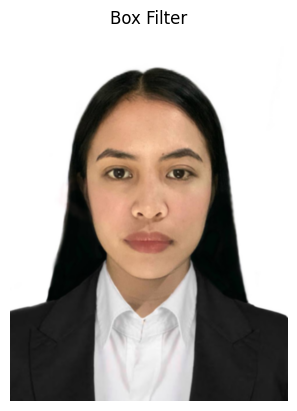

In [17]:
def box_blur(img):
  box = cv2.boxFilter(img, -1, (5, 5))
  return box
# Apply Box filter to the uploaded image
box_blurred = box_blur(image)
plt.imshow(cv2.cvtColor(box_blurred, cv2.COLOR_BGR2RGB))
plt.title("Box Filter")
plt.axis('off')
plt.show()

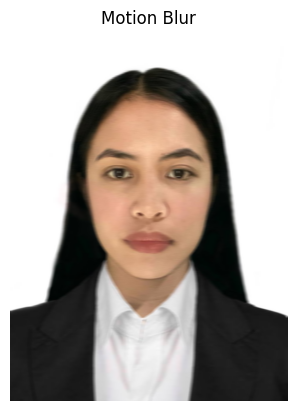

In [18]:
def motion_blur(img):
# Create motion blur kernel (size 15x15)
  kernel_size = 15
  kernel = np.zeros((kernel_size, kernel_size))
  kernel[int((kernel_size - 1) / 2), :] = np.ones(kernel_size)
  kernel = kernel / kernel_size
  # Apply motion blur
  motion_blurred = cv2.filter2D(img, -1, kernel)
  return motion_blurred
# Apply Motion blur to the uploaded image
motion_blurred = motion_blur(image)
plt.imshow(cv2.cvtColor(motion_blurred, cv2.COLOR_BGR2RGB))
plt.title("Motion Blur")
plt.axis('off')
plt.show()

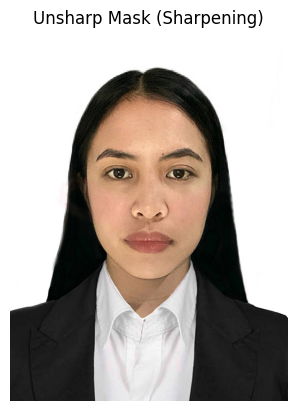

In [19]:
def unsharp_mask(img):
# Create a Gaussian blur version of the image
  blurred = cv2.GaussianBlur(img, (9, 9), 10.0)
  # Sharpen by adding the difference between the original and the blurred image
  sharpened = cv2.addWeighted(img, 1.5, blurred, -0.5, 0)
  return sharpened
# Apply Unsharp Masking to the uploaded image
sharpened_image = unsharp_mask(image)
plt.imshow(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB))
plt.title("Unsharp Mask (Sharpening)")
plt.axis('off')
plt.show()

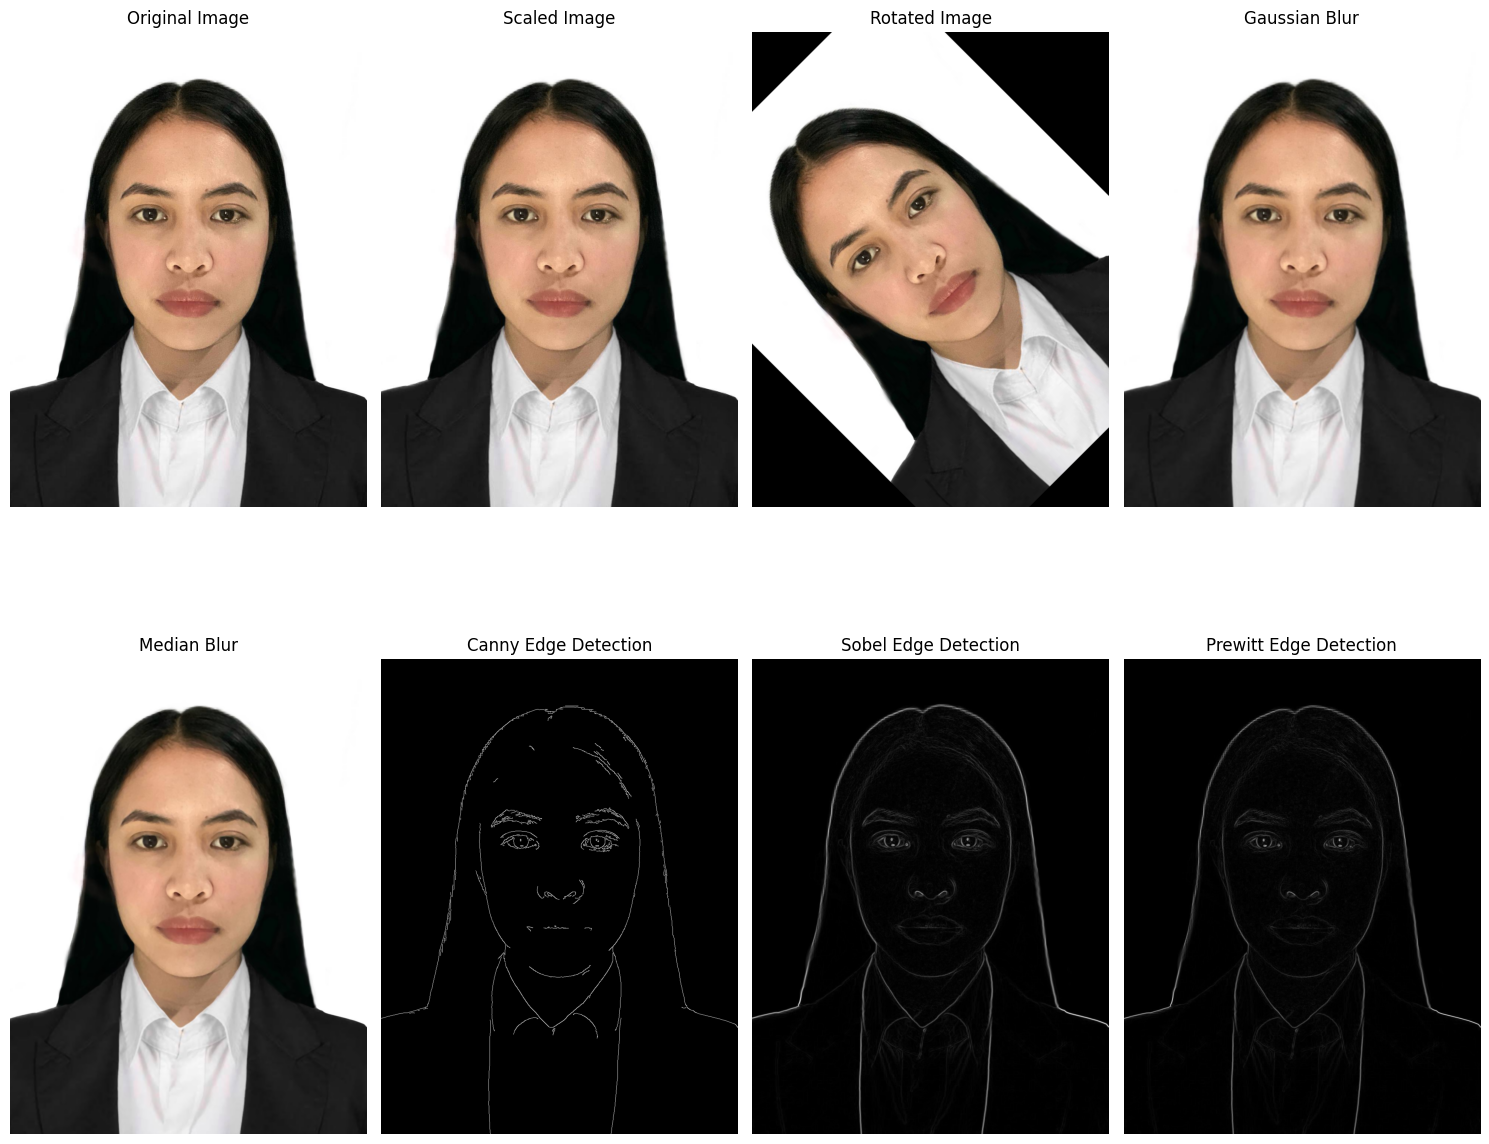

In [20]:
# prompt: output all iamges in one plot

plt.figure(figsize=(15, 14))

plt.subplot(2, 4, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 4, 2)
plt.imshow(cv2.cvtColor(scaled_image, cv2.COLOR_BGR2RGB))
plt.title("Scaled Image")
plt.axis('off')

plt.subplot(2, 4, 3)
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
plt.title("Rotated Image")
plt.axis('off')

plt.subplot(2, 4, 4)
plt.imshow(cv2.cvtColor(gaussian_blur, cv2.COLOR_BGR2RGB))
plt.title("Gaussian Blur")
plt.axis('off')

plt.subplot(2, 4, 5)
plt.imshow(cv2.cvtColor(median_blur, cv2.COLOR_BGR2RGB))
plt.title("Median Blur")
plt.axis('off')

plt.subplot(2, 4, 6)
plt.imshow(edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis('off')

plt.subplot(2, 4, 7)
plt.imshow(sobel_edges, cmap='gray')
plt.title("Sobel Edge Detection")
plt.axis('off')

plt.subplot(2, 4, 8)
plt.imshow(prewitt_edges, cmap='gray')
plt.title("Prewitt Edge Detection")
plt.axis('off')


plt.tight_layout()
plt.show()

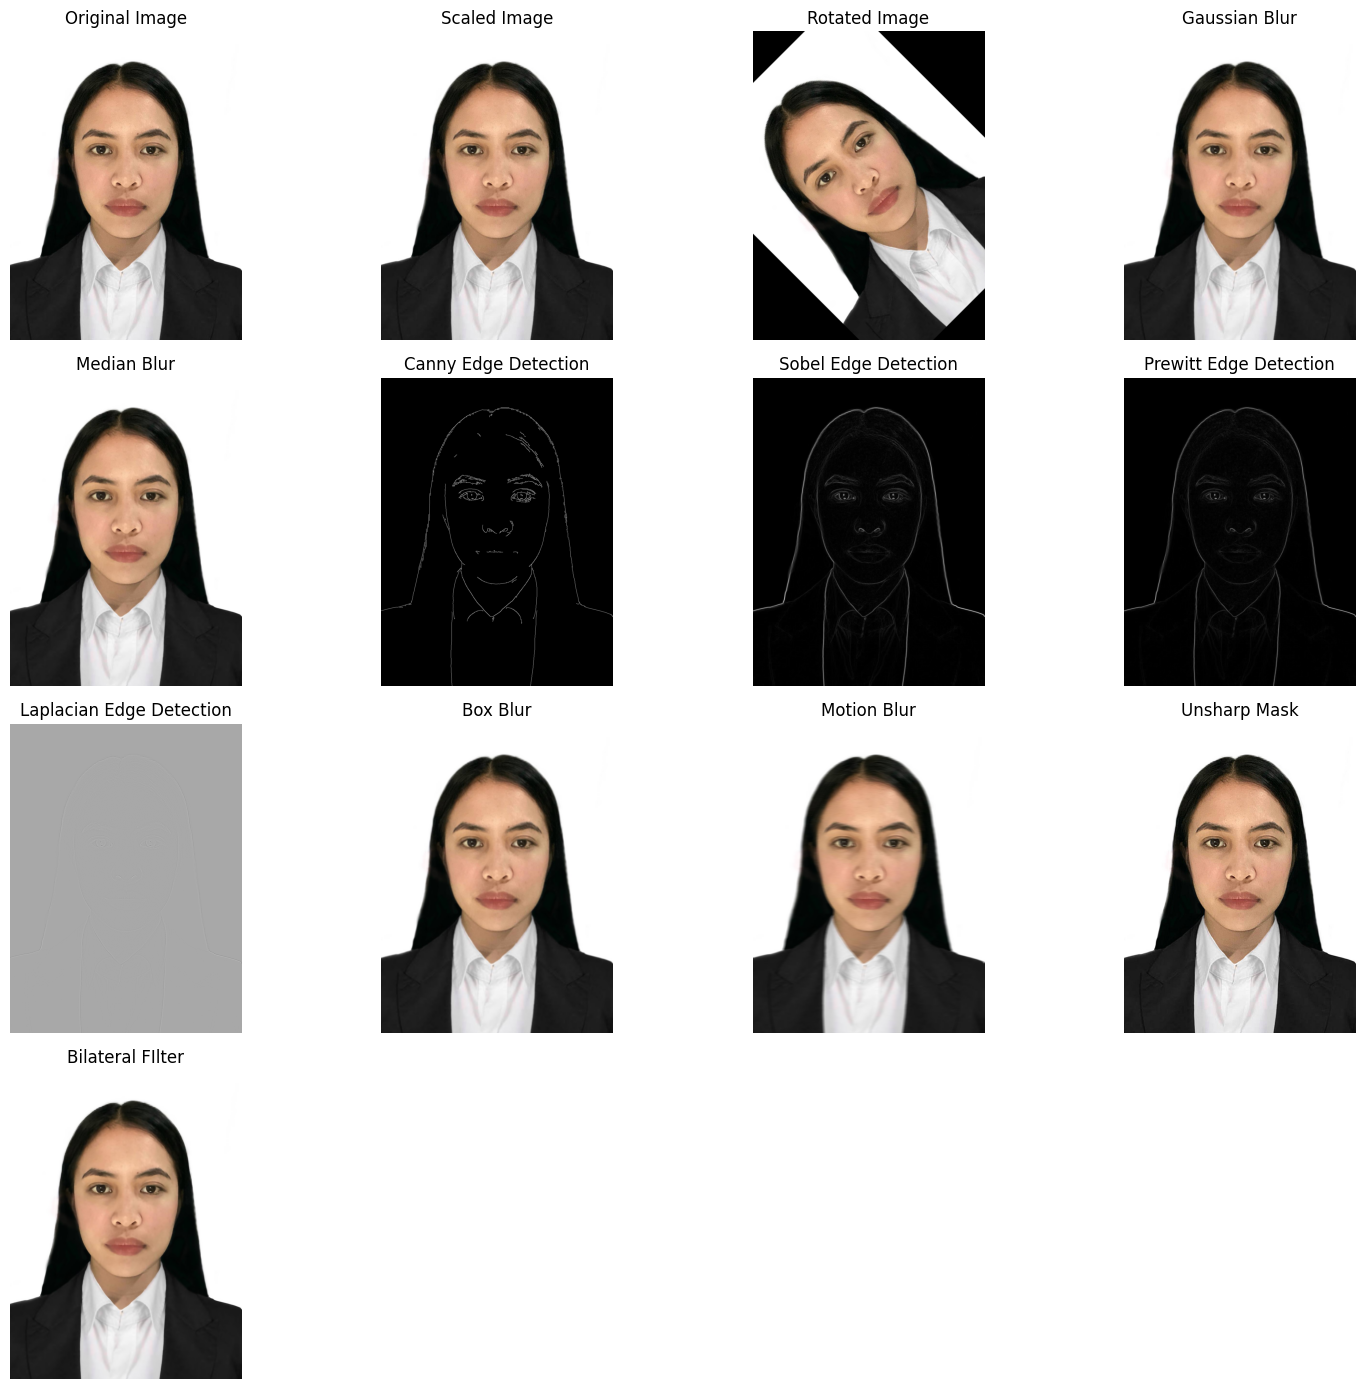

In [21]:
plt.figure(figsize=(15, 14))

plt.subplot(4, 4, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(4, 4, 2)
plt.imshow(cv2.cvtColor(scaled_image, cv2.COLOR_BGR2RGB))
plt.title("Scaled Image")
plt.axis('off')

plt.subplot(4, 4, 3)
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
plt.title("Rotated Image")
plt.axis('off')

plt.subplot(4, 4, 4)
plt.imshow(cv2.cvtColor(gaussian_blur, cv2.COLOR_BGR2RGB))
plt.title("Gaussian Blur")
plt.axis('off')

plt.subplot(4, 4, 5)
plt.imshow(cv2.cvtColor(median_blur, cv2.COLOR_BGR2RGB))
plt.title("Median Blur")
plt.axis('off')

plt.subplot(4, 4, 6)
plt.imshow(edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis('off')

plt.subplot(4, 4, 7)
plt.imshow(sobel_edges, cmap='gray')
plt.title("Sobel Edge Detection")
plt.axis('off')

plt.subplot(4, 4, 8)
plt.imshow(prewitt_edges, cmap='gray')
plt.title("Prewitt Edge Detection")
plt.axis('off')

plt.subplot(4, 4, 9)
plt.imshow(laplacian_edges, cmap='gray')
plt.title("Laplacian Edge Detection")
plt.axis('off')

plt.subplot(4, 4, 10)
plt.imshow(cv2.cvtColor(box_blurred, cv2.COLOR_BGR2RGB))
plt.title("Box Blur")
plt.axis('off')

plt.subplot(4, 4, 11)
plt.imshow(cv2.cvtColor(motion_blurred, cv2.COLOR_BGR2RGB))
plt.title("Motion Blur")
plt.axis('off')

plt.subplot(4, 4, 12)
plt.imshow(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB))
plt.title("Unsharp Mask")
plt.axis('off')


plt.subplot(4, 4, 13)
plt.imshow(cv2.cvtColor(bilateral_filter, cv2.COLOR_BGR2RGB))
plt.title("Bilateral FIlter")
plt.axis('off')



plt.tight_layout()
plt.show()